# <font color = red> Kaggle_COVID-19 Week 2 Task 

In [29]:
import numpy as np 
import pandas as pd 
import nltk
import re
from datetime import datetime

In [2]:
cd "C:\Users\Celine\Desktop\UNH\9-1\902\CORD-19-research-challenge"

C:\Users\Celine\Desktop\UNH\9-1\902\CORD-19-research-challenge


In [10]:
df_all= pd.read_csv("df_all.csv")
print(df_all.shape)
df_all.head()

(29315, 5)


,Unnamed: 0,paper_id,title,abstract,body_text
0,0,0015023cc06b5362d332b3baf348d11567ca2fbb,The RNA pseudoknots in foot-and-mouth disease ...,word count: 194 22 Text word count: 5168 23 24...,"VP3, and VP0 (which is further processed to VP..."
1,1,004f0f8bb66cf446678dc13cf2701feec4f36d76,Healthcare-resource-adjusted vulnerabilities t...,NaN,The 2019-nCoV epidemic has spread across China...
2,2,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,"Real-time, MinION-based, amplicon sequencing f...",Infectious bronchitis (IB) causes significant ...,"Infectious bronchitis (IB), which is caused by..."
3,3,0139ea4ca580af99b602c6435368e7fdbefacb03,A Combined Evidence Approach to Prioritize Nip...,Nipah Virus (NiV) came into limelight recently...,Nipah is an infectious negative-sense single-s...
4,4,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,Assessing spread risk of Wuhan novel coronavir...,Background: A novel coronavirus (2019-nCoV) em...,"In December 2019, a cluster of patients with p..."


In [4]:
metadata = pd.read_csv("metadata.csv")
print(metadata.shape)
print(metadata.columns)
metadata.head()

(44220, 15)
Index(['sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id', 'license',
       'abstract', 'publish_time', 'authors', 'journal',
       'Microsoft Academic Paper ID', 'WHO #Covidence', 'has_full_text',
       'full_text_file'],
      dtype='object')


,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
0,NaN,Elsevier,Intrauterine virus infections and congenital h...,10.1016/0002-8703(72)90077-4,NaN,4361535.0,els-covid,Abstract The etiologic basis for the vast majo...,1972-12-31,"Overall, James C.",American Heart Journal,NaN,NaN,False,custom_license
1,NaN,Elsevier,Coronaviruses in Balkan nephritis,10.1016/0002-8703(80)90355-5,NaN,6243850.0,els-covid,NaN,1980-03-31,"Georgescu, Leonida; Diosi, Peter; Buţiu, Ioan;...",American Heart Journal,NaN,NaN,False,custom_license
2,NaN,Elsevier,Cigarette smoking and coronary heart disease: ...,10.1016/0002-8703(80)90356-7,NaN,7355701.0,els-covid,NaN,1980-03-31,"Friedman, Gary D",American Heart Journal,NaN,NaN,False,custom_license
3,aecbc613ebdab36753235197ffb4f35734b5ca63,Elsevier,Clinical and immunologic studies in identical ...,10.1016/0002-9343(73)90176-9,NaN,4579077.0,els-covid,"Abstract Middle-aged female identical twins, o...",1973-08-31,"Brunner, Carolyn M.; Horwitz, David A.; Shann,...",The American Journal of Medicine,NaN,NaN,True,custom_license
4,NaN,Elsevier,Epidemiology of community-acquired respiratory...,10.1016/0002-9343(85)90361-4,NaN,4014285.0,els-covid,Abstract Upper respiratory tract infections ar...,1985-06-28,"Garibaldi, Richard A.",The American Journal of Medicine,NaN,NaN,False,custom_license


In [6]:
merge = pd.merge(df_all, metadata, how='inner', left_on="paper_id", right_on='sha')
merge.shape
merge.head()


,Unnamed: 0,paper_id,title_x,abstract_x,body_text,sha,source_x,title_y,doi,pmcid,pubmed_id,license,abstract_y,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
0,0,0015023cc06b5362d332b3baf348d11567ca2fbb,The RNA pseudoknots in foot-and-mouth disease ...,word count: 194 22 Text word count: 5168 23 24...,"VP3, and VP0 (which is further processed to VP...",0015023cc06b5362d332b3baf348d11567ca2fbb,biorxiv,The RNA pseudoknots in foot-and-mouth disease ...,10.1101/2020.01.10.901801,NaN,NaN,biorxiv,The positive stranded RNA genomes of picornavi...,2020-01-11,"Ward, J. C. J.; Lasecka-Dykes, L.; Neil, C.; A...",NaN,NaN,NaN,True,biorxiv_medrxiv
1,1,004f0f8bb66cf446678dc13cf2701feec4f36d76,Healthcare-resource-adjusted vulnerabilities t...,NaN,The 2019-nCoV epidemic has spread across China...,004f0f8bb66cf446678dc13cf2701feec4f36d76,medrxiv,Healthcare-resource-adjusted vulnerabilities t...,10.1101/2020.02.11.20022111,NaN,NaN,medrvix,We integrate the human movement and healthcare...,2020-02-12,Hanchu Zhou; Jianan Yang; Kaichen Tang; Qingpe...,NaN,NaN,NaN,True,biorxiv_medrxiv
2,2,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,"Real-time, MinION-based, amplicon sequencing f...",Infectious bronchitis (IB) causes significant ...,"Infectious bronchitis (IB), which is caused by...",00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,biorxiv,"Real-time, MinION-based, amplicon sequencing f...",10.1101/634600,NaN,NaN,biorxiv,Infectious bronchitis (IB) causes significant ...,2019-05-10,"Butt, S. L.; Erwood, E. C.; Zhang, J.; Sellers...",NaN,NaN,NaN,True,biorxiv_medrxiv
3,3,0139ea4ca580af99b602c6435368e7fdbefacb03,A Combined Evidence Approach to Prioritize Nip...,Nipah Virus (NiV) came into limelight recently...,Nipah is an infectious negative-sense single-s...,0139ea4ca580af99b602c6435368e7fdbefacb03,biorxiv,A Combined Evidence Approach to Prioritize Nip...,10.1101/2020.03.12.977918,NaN,NaN,biorxiv,AbstractBackgroundNipah Virus (NiV) came into ...,2020-03-12,Nishi Kumari; Ayush Upadhyay; Kishan Kalia; Ra...,NaN,NaN,NaN,True,biorxiv_medrxiv
4,4,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,Assessing spread risk of Wuhan novel coronavir...,Background: A novel coronavirus (2019-nCoV) em...,"In December 2019, a cluster of patients with p...",013d9d1cba8a54d5d3718c229b812d7cf91b6c89,medrxiv,Assessing spread risk of Wuhan novel coronavir...,10.1101/2020.02.04.20020479,NaN,NaN,medrvix,Background: A novel coronavirus (2019-nCoV) em...,2020-02-05,Shengjie Lai; Isaac Bogoch; Nick Ruktanonchai;...,NaN,NaN,NaN,True,biorxiv_medrxiv


In [12]:
#extra step for getting different dataset 
extract_data =merge[["paper_id","title_x", "body_text"]]
print(extract_data.shape)
extract_data.head()

(27690, 3)


,paper_id,title_x,body_text
0,0015023cc06b5362d332b3baf348d11567ca2fbb,The RNA pseudoknots in foot-and-mouth disease ...,"VP3, and VP0 (which is further processed to VP..."
1,004f0f8bb66cf446678dc13cf2701feec4f36d76,Healthcare-resource-adjusted vulnerabilities t...,The 2019-nCoV epidemic has spread across China...
2,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,"Real-time, MinION-based, amplicon sequencing f...","Infectious bronchitis (IB), which is caused by..."
3,0139ea4ca580af99b602c6435368e7fdbefacb03,A Combined Evidence Approach to Prioritize Nip...,Nipah is an infectious negative-sense single-s...
4,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,Assessing spread risk of Wuhan novel coronavir...,"In December 2019, a cluster of patients with p..."


### 3. Data processing step (Tokenization ,Remove punctuation and special characters ,lowercase)

In [12]:
# tokenize words for the search engine 
tokenizer = RegexpTokenizer(r'\w+')
stemmer = PorterStemmer() 
stop_words = set(stopwords.words('english'))


In [11]:
# word tokenize dependencies 
import nltk
# nltk.download('stopwords')
#nltk.download('punkt')
from nltk import word_tokenize
from nltk import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np

#clutering function
from sklearn.cluster import KMeans

## DTM Makers ####
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Celine\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

### 4. The objective is to create a Search engine to find papers based on key words. 

Start with search one word 

Use Regular expressions to find one word

A combination of words (do it on body text)


In [18]:
#tNote: his part of code is take from Josh

input_word = input("Search:")

stop_words = set(stopwords.words('english'))
input_word = input_word.lower().split(" ")
input_word = [word for word in input_word if word not in stop_words]


word_count = []
drops = []

#input pattern 
pattern = ''
for word in input_word:
    word = word +"|"  # means word_a or word_b or word_c whatever word in the sentence  
    pattern = pattern +word 
    
#search whole document

for i,j in enumerate(df_all.body_text):
    j = j.lower()
    match =re.findall("{}".format(pattern), j)
#     match = re.match(pattern, j)
    z = 0
    for word in match:
         if word != '': 
                z+=1
    if z > 0:
        word_count.append(z)
        drops.append(True)
    else:
        drops.append(False)


final_df = df_all[drops] # condition only pick the document with searching words 
final_df['word_counts'] = word_count 


Search:covid


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
final_df.sort_values('word_counts',ascending=False)

,Unnamed: 0,paper_id,title,abstract,body_text,word_counts
45,45,0e38333bff68345492526fd39b70d1b18969cb83,Deep Learning-based Detection for COVID-19 fro...,Accurate and rapid diagnosis of COVID-19 suspe...,"huge amount of efforts for radiologists, which...",62
47,47,0eee9760aee0ca2fdf8d1d215c3689d5f8d84df5,Prevalence and clinical features of 2019 novel...,Background With the spread of COVID-19 from Wu...,The first cluster of cases of pneumonia with u...,58
308,308,57a86b3acd182c955877afd4792719a4e9a0ac32,Cross-sectional Study Affiliations,"Background: So far, the psychological impact o...","Since December 2019, coronavirus disease 2019 ...",56
10982,10982,0f15655bda78c3a62a03a19d8028f8f5cf5a1ef5,Clinical characteristics and intrauterine vert...,Background Previous studies on the pneumonia o...,The type of pneumonia caused by the 2019 novel...,56
746,746,de055f09fef2776bc78bac5d58c4131301b2025f,Impacts of Social and Economic Factors on the ...,This paper examines the role of various socioe...,Several clusters of patients with pneumonia of...,51
...,...,...,...,...,...,...
13376,13376,32bc6e6fdbe51b64640357919dc17f29e9b0ebb1,Psychological crisis intervention during the o...,NaN,The outbreak of new coronavirus pneumonia (NCP...,1
13565,13565,35be4bfe3809797eb672c5f54b37d3cbd996db74,Highlights Risk factors control in atheroscler...,NaN,"In Taiwan, atherosclerotic cardiovascular dise...",1
13600,13600,364563f6674928b4a6386e656dd217d37e656645,Journal Pre-proof Estimation of the asymptomat...,NaN,This is a PDF file of an article that has unde...,1
14316,14316,40dabecefc2f0a2b750e000d1c15cca57a3f7dd4,ANIMAL VIRUSES OF ECONOMIC IMPORTANCE: GENETIC...,NaN,This article is intended as a review of the re...,1


### 5. Cluster papers (K-mean, DBScan)

In [36]:
# name stop words in document 
en_stop = stopwords.words('english')

#extend the stopword list
en_stop.extend(['#', '$', '%', '&', "'", "''", "'s", '(', ')', '*', '+', ',', '-', '.', '..', '...', '.a', '.in', '.the', '.we', '/', '//doi.org/10', '//doi.org/10.1101', '//doi.org/10.1101/2020.02', '//doi.org/10.1101/2020.03', '/2020', '/l', '0', '0.001', '0.01', '0.05', '0.5', '0.8', '0.9', '1', '1.', '1.5', '10', '100', '1000', '11', '1101', '12', '120', '13', '14', '15', '16', '17', '18', '19','21', '22', '23', '24', '25', '26', '27', '28', '29', '2a', '2b', '3', '30', '300', '31', '32', '33', '34', '35', '36', '37', '38', '39', '3a', '3b', '3d', '4', '4.0', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '500', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '77', '78', '79', '8', '80', '81', '82', '83', '85', '86', '88', '9', '90', '92', '93', '95', '96', '98', '99', ':', ';', '<', '=', '>', '?', '[', ']', '``','±', '×', 'à', 'α', 'β', 'γ', 'δ', 'θ', 'τ', '•', '′', '−', '≤'])
print(en_stop)

# name stemmer in document
stemmer = PorterStemmer()

# name tokenizer in document
tokenizer = RegexpTokenizer(r'\w+')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [52]:
#Second way to make dtm
#extract bodt_text from datafrome to a list
body_text_list = final_df["body_text"].to_list()
print(body_text_list[0:3])

['The sudden outbreak of the new coronavirus (SARS-CoV-2) at the end of December 2019 poses a huge threat to human health worldwide. The SARS-CoV-2 virus causes severe respiratory disease that can quickly spread from person to person and in some cases lead to death.Researchers have found that the new SARS-CoV-2 and SARS coronaviruses invade human cells in target tissues in a similar manner via high-affinity binding to angiotensin-converting enzyme 2 (ACE2) [1] . In recent epidemiological investigations of the spread of the SARS-CoV-2 and a preliminary study of the clinical characteristics of this disease [2] [3] [4] [5] [6] , researchers have found that patients infected with the new coronavirus have severe symptoms similar to those of the SARS infection. The first batch of clinical data reports of SARS-CoV-2 infection cases in China revealed "cytokine storms" in critically ill patients [7, 8] . However, the mechanism of the viral infection and pathological changes in the immune system

In [37]:
start = datetime.now() 

# function for stemming all words and create the DTM after filtering the document  

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems


vect = CountVectorizer(tokenizer=tokenize, stop_words = en_stop, ngram_range= (1,1),max_features = 2000)
print("fit option has \n" ,vect.fit(body_text_list))
dtm = vect.transform(body_text_list)

end = datetime.now()
run_time = end-start
print(start, end, run_time)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'ve", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'ha', 'hi', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'thi', 'veri', 'wa', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


fit option has 
 CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=2000, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function tokenize at 0x00000224C7C14A68>,
                vocabulary=None)
2020-04-12 22:14:06.301697 2020-04-12 22:15:12.593184 0:01:06.291487


In [41]:
final_df2 = pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())

In [38]:
print(dtm.shape)
print(vect.get_feature_names())

(665, 2000)
['-1', '.to', '0.1', '1980', '1981', '1982', '1983', '1984', '1a', '1b', '1c', '2', '2.', '2.2', '2.5', '20', '200', '2002', '2003', '2004', '2009', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2019-ncov', '2020', '2020.', '2c', '5.2', '7.5', '76', '87', '89', '94', '97', 'ab', 'abdomin', 'abil', 'abl', 'abnorm', 'abov', 'absenc', 'absolut', 'absorb', 'abstract', 'abund', 'acceler', 'accept', 'access', 'accompani', 'accord', 'account', 'accumul', 'accur', 'accuraci', 'ace2', 'achiev', 'acid', 'acquir', 'across', 'act', 'action', 'activ', 'actual', 'acut', 'ad', 'adapt', 'addit', 'address', 'adequ', 'adjust', 'administ', 'administr', 'admiss', 'admit', 'adopt', 'adult', 'advanc', 'advantag', 'advers', 'advis', 'aerosol', 'affect', 'affin', 'africa', 'african', 'age', 'agenc', 'agent', 'aggreg', 'agreement', 'aid', 'aim', 'air', 'airborn', 'airport', 'airway', 'aki', 'al', 'al.', 'alert', 'algorithm', 'align', 'allel', 'allow', 'almost', 'alon', 'a

In [69]:
#extract body text from filtering dataset


bodytext = (final_df["body_text"].values).tolist() #convert values to list of lists (each row becomes a separate list) 
print(type(bodytext))
print(len(bodytext))


<class 'list'>
665


In [60]:
print(bodytext_list[0:1])

[['sudden', 'outbreak', 'new', 'coronaviru', 'sar', 'cov', '2', 'end', 'decemb', '2019', 'pose', 'huge', 'threat', 'human', 'health', 'worldwid', 'sar', 'cov', '2', 'viru', 'caus', 'sever', 'respiratori', 'diseas', 'quickli', 'spread', 'person', 'person', 'case', 'lead', 'death', 'research', 'found', 'new', 'sar', 'cov', '2', 'sar', 'coronavirus', 'invad', 'human', 'cell', 'target', 'tissu', 'similar', 'manner', 'via', 'high', 'affin', 'bind', 'angiotensin', 'convert', 'enzym', '2', 'ace2', 'recent', 'epidemiolog', 'investig', 'spread', 'sar', 'cov', '2', 'preliminari', 'studi', 'clinic', 'characterist', 'diseas', '2', 'research', 'found', 'patient', 'infect', 'new', 'coronaviru', 'sever', 'symptom', 'similar', 'sar', 'infect', 'first', 'batch', 'clinic', 'data', 'report', 'sar', 'cov', '2', 'infect', 'case', 'china', 'reveal', 'cytokin', 'storm', 'critic', 'ill', 'patient', 'howev', 'mechan', 'viral', 'infect', 'patholog', 'chang', 'immun', 'system', 'still', 'lack', 'sooner', 'inform

In [70]:
# not complete yet   
# why 'list' object has no attribute 'lower' ???
start = datetime.now() 
#tokenize the document after filtering 
tokens = [tokenizer.tokenize(str(i)) for i in bodytext] #tokenize words in lists

# print(tokens)

# remove stopwords, stemming and put word into list using "for loop"
bodytext_list = []

for w in tokens:
    stopped = [i for i in w if str(i).lower() not in en_stop] #remove stop words
    stemmed = [stemmer.stem(i) for i in stopped] #stem words
    bodytext_list.append(stemmed) #append stemmed words to list
    


end = datetime.now()
run_time = end-start
print(start, "\n",
      end, "\n",
      'run_time =',run_time )


2020-04-12 23:16:09.583578 
 2020-04-12 23:16:29.454100 
 run_time = 0:00:19.870522


In [81]:
print(bodytext_list[0])

# bodytext_list_1 = [i.split() for i in bodytext_list] 
# bodytext_list_1


['sudden', 'outbreak', 'new', 'coronaviru', 'sar', 'cov', '2', 'end', 'decemb', '2019', 'pose', 'huge', 'threat', 'human', 'health', 'worldwid', 'sar', 'cov', '2', 'viru', 'caus', 'sever', 'respiratori', 'diseas', 'quickli', 'spread', 'person', 'person', 'case', 'lead', 'death', 'research', 'found', 'new', 'sar', 'cov', '2', 'sar', 'coronavirus', 'invad', 'human', 'cell', 'target', 'tissu', 'similar', 'manner', 'via', 'high', 'affin', 'bind', 'angiotensin', 'convert', 'enzym', '2', 'ace2', 'recent', 'epidemiolog', 'investig', 'spread', 'sar', 'cov', '2', 'preliminari', 'studi', 'clinic', 'characterist', 'diseas', '2', 'research', 'found', 'patient', 'infect', 'new', 'coronaviru', 'sever', 'symptom', 'similar', 'sar', 'infect', 'first', 'batch', 'clinic', 'data', 'report', 'sar', 'cov', '2', 'infect', 'case', 'china', 'reveal', 'cytokin', 'storm', 'critic', 'ill', 'patient', 'howev', 'mechan', 'viral', 'infect', 'patholog', 'chang', 'immun', 'system', 'still', 'lack', 'sooner', 'inform'

In [ ]:
vect = CountVectorizer(tokenizer=tokenizer, stop_words = en_stop, ngram_range= (1,1),max_features = 2000)
print("fit option has \n" ,vect.fit(bodytext_list))
dtm3 = vect.transform(bodytext_list)
final_df3 = pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())
final_df3

### 6. Topic Extraction (opposite of Clusters, similar to PCA) cluster the column

### 7. Can clustering be done as the second step, after narrowing the scope using step 4?

In [40]:
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
import matplotlib._color_data as mcd
import matplotlib.pyplot as plt
import seaborn as sns

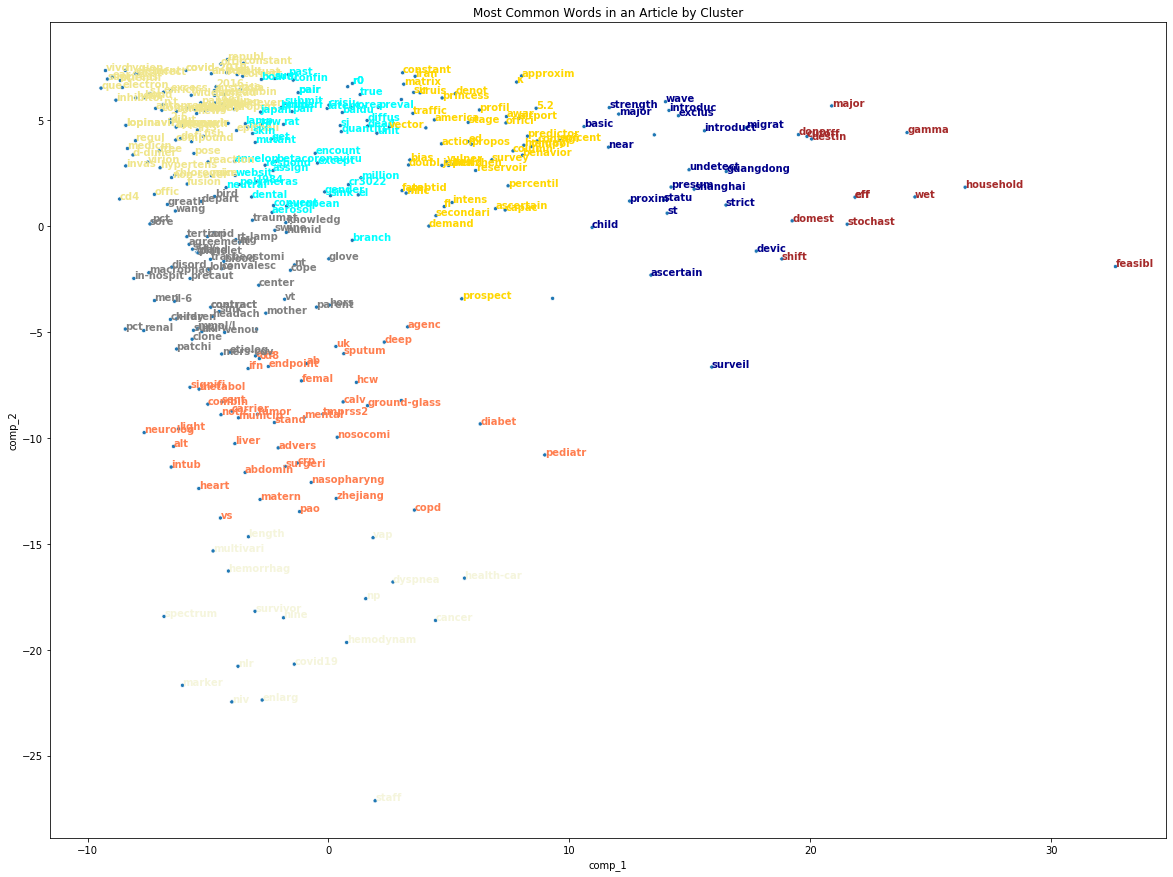

In [42]:
#this part of code is take from Josh    #get differnt cluster because extend stop words list

#### parameters #####
contamination = .1
n_clusters=8

##### preserving data from previous step
df_t = final_df
df2_t = final_df2
master_t = pd.concat([df_t.reset_index(),df2_t.reset_index()], axis=1)
master_t = master_t.dropna()

##### Droping Outliers 
master_t = pd.concat([df_t.reset_index(),df2_t], axis=1)
clf = IsolationForest(n_jobs=-1, contamination=contamination)
master_t['outliers']=clf.fit_predict(master_t.iloc[:,8:])
master_t.iloc[:, 8:] = master_t[master_t.outliers == 1]
master_t = master_t.dropna()

##### Standardizing DF
sc = StandardScaler()
master_t.iloc[:,8:-1] = sc.fit_transform(master_t.iloc[:,8:-1] +.000001)
pca=SparsePCA(n_components=2)
pca_componenets = pca.fit_transform(master_t.iloc[:,8:-1])
pca_componenets = pd.DataFrame(pca_componenets, columns=['comp_1', 'comp_2'])
master_t=pd.concat([master_t.reset_index(),pca_componenets], axis=1)

### Clustering
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=n_clusters,n_jobs=-1)
master_t['clusters'] = clf.fit_predict(master_t.iloc[:,-2:])


### Grpahing 
plt.figure(figsize=(20,15))
p1 = sns.scatterplot(master_t['comp_1'],master_t['comp_2'],data=master_t,size = 10,legend=False)  
p1.set_title("Most Common Words in an Article by Cluster")
colors = [name for name in mcd.CSS4_COLORS if "xkcd:" + name in mcd.XKCD_COLORS]


for title in range(10,master_t.shape[0]):
  most_common=master_t.iloc[title, 9:-5].sort_values().index[-1]
  p1.text(master_t.comp_1[title], master_t.comp_2[title], most_common, horizontalalignment='left', color=colors[master_t.clusters[title] * 3], size =10, weight='semibold')

### 8. How can Word2Vec be used? 

Choose 3 words and do W2V separate then see similarity for those 3 words.

### 9. How can Sen2Vec be used? 
Bert(horsepower behind google), Doctor QA (Facebook)

### 10. How can Doc2Vec be used?